In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.io
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
def f(y, t, params):
    z, phi = y
    Ntot, K, Tbar, Kbar, Khat, Jhat, Chi, Eta, Ubar = params
    derivs = [-(2*Ntot*(2*Khat*Ntot + Ubar)*(-1 + z*z)*np.cos(phi) + np.sqrt(1 - z*z)*(2*K -Ntot*(2*Tbar + Ntot*(Jhat + 2*Kbar + (Jhat - 2*Kbar)*z*z)) + 
        Kbar*Ntot*Ntot*(-1 + z*z)*np.cos(2*phi)))*np.sin(phi), 1.0/(2*np.sqrt(1 - z*z))*z*(2*Ntot*np.sqrt(1 - z*z)*(-3.0*Khat*Ntot - 2*Ubar - Ntot*Eta +Chi) + 
    4*K*np.cos(phi) + Ntot*(-4*Tbar + Jhat*Ntot*(2 - 6*z*z) + 9*Kbar*Ntot*(-1 + z*z))*np.cos(phi) - 
    2*Ntot*(2*Khat*Ntot + Ubar)*np.sqrt(1 - z*z)*np.cos(2*phi) + Kbar*Ntot*Ntot*(-1 + z*z)*np.cos(3*phi))]
    return derivs

In [3]:
Ntot = 2*28000 #2Nsol
K = -0.004864919447345814
g2scalefactor=1
Tbar = -1.8075612038293718e-7
Kbar = 2.2242959064768597e-14*g2scalefactor
Khat = 7.495469583183837e-14*g2scalefactor
Jhat = 9.377865454223399e-13*g2scalefactor
Chi = -2.9938271819039437e-6
Eta = -1.8565162266212234e-11*g2scalefactor
Ubar = -4.272832440832012e-8
#Initial Values
#z0=[0.1,0.3,0.5,0.7,-0.1,-0.3,-0.5,-0.7]
z0=[0.2,0.4,0.7,-0.2,-0.4,-0.7]
phi10=[0,2*pi,-2*pi]
phi20=[pi,-pi,3*pi,-3*pi]
# Parameters for ODE solvers
params = [Ntot, K, Tbar, Kbar, Khat, Jhat, Chi, Eta, Ubar]

In [4]:
Ntot = 2*28000 #2Nsol
K_2 = -0.004864919447345814
g2scalefactor=2
Tbar_2 = -1.8075612038293718e-7
Kbar_2 = 2.2242959064768597e-14*g2scalefactor
Khat_2 = 7.495469583183837e-14*g2scalefactor
Jhat_2 = 9.377865454223399e-13*g2scalefactor
Chi_2 = -2.9938271819039437e-6
Eta_2 = -1.8565162266212234e-11*g2scalefactor
Ubar_2 = -4.272832440832012e-8
#Initial Values
#z0=[0.1,0.3,0.5,0.7,-0.1,-0.3,-0.5,-0.7]
z0=[0.2,0.4,0.7,-0.2,-0.4,-0.7]
phi10=[0,2*pi,-2*pi]
phi20=[pi,-pi,3*pi,-3*pi]
# Parameters for ODE solvers
params_2 = [Ntot, K_2, Tbar_2, Kbar_2, Khat_2, Jhat_2, Chi_2, Eta_2, Ubar_2]

In [5]:
tstop=400
tinc=0.05
t=np.arange (0., tstop, tinc)

In [6]:
##### Defining the Random Distribution ############# (Always run from this cell if you want to run again)##
Nsol=28000
NT=2*Nsol
sigma_a=(349.8/sqrt(2))
muz, sigmaz = 0, (2*sigma_a/NT) 
muphi,sigmaphi=0, (0.229/sqrt(2))
zt1=[]
phit1=[]
phi1temp=[]
muphi2,sigmaphi2=0, (0.2099/sqrt(2))
zt2=[]
phit2=[]
phi2temp=[]
zt3=[]
phit3=[]
phi3temp=[]
for i in range (100):
    ####### (0,0) ##############
    zinitial1=0+(np.random.normal(muz, sigmaz))*sigmaz
    phiinitial1=(0+(np.random.normal(muphi, sigmaphi))*sigmaphi)
    phiinitial1temp=phiinitial1/pi
    phit1.append(phiinitial1)
    phi1temp.append(phiinitial1temp)
    zt1.append(zinitial1)
    ########### (0,pi) #############
    zinitial2=0+(np.random.normal(muz, sigmaz))*sigmaz
    phiinitial2=(pi+(np.random.normal(muphi2, sigmaphi2))*sigmaphi2)
    phiinitialtemp=phiinitial2/pi
    phi2temp.append(phiinitialtemp)
    phit2.append(phiinitial2)
    zt2.append(zinitial2)
    ####### Normal Distribution ########
    zinitial3=0+(np.random.normal(muz, sigmaz))*sigmaz
    phiinitial3=np.random.uniform(-2*pi,2*pi)
    zt3.append(zinitial3)
    phit3.append(phiinitial3)

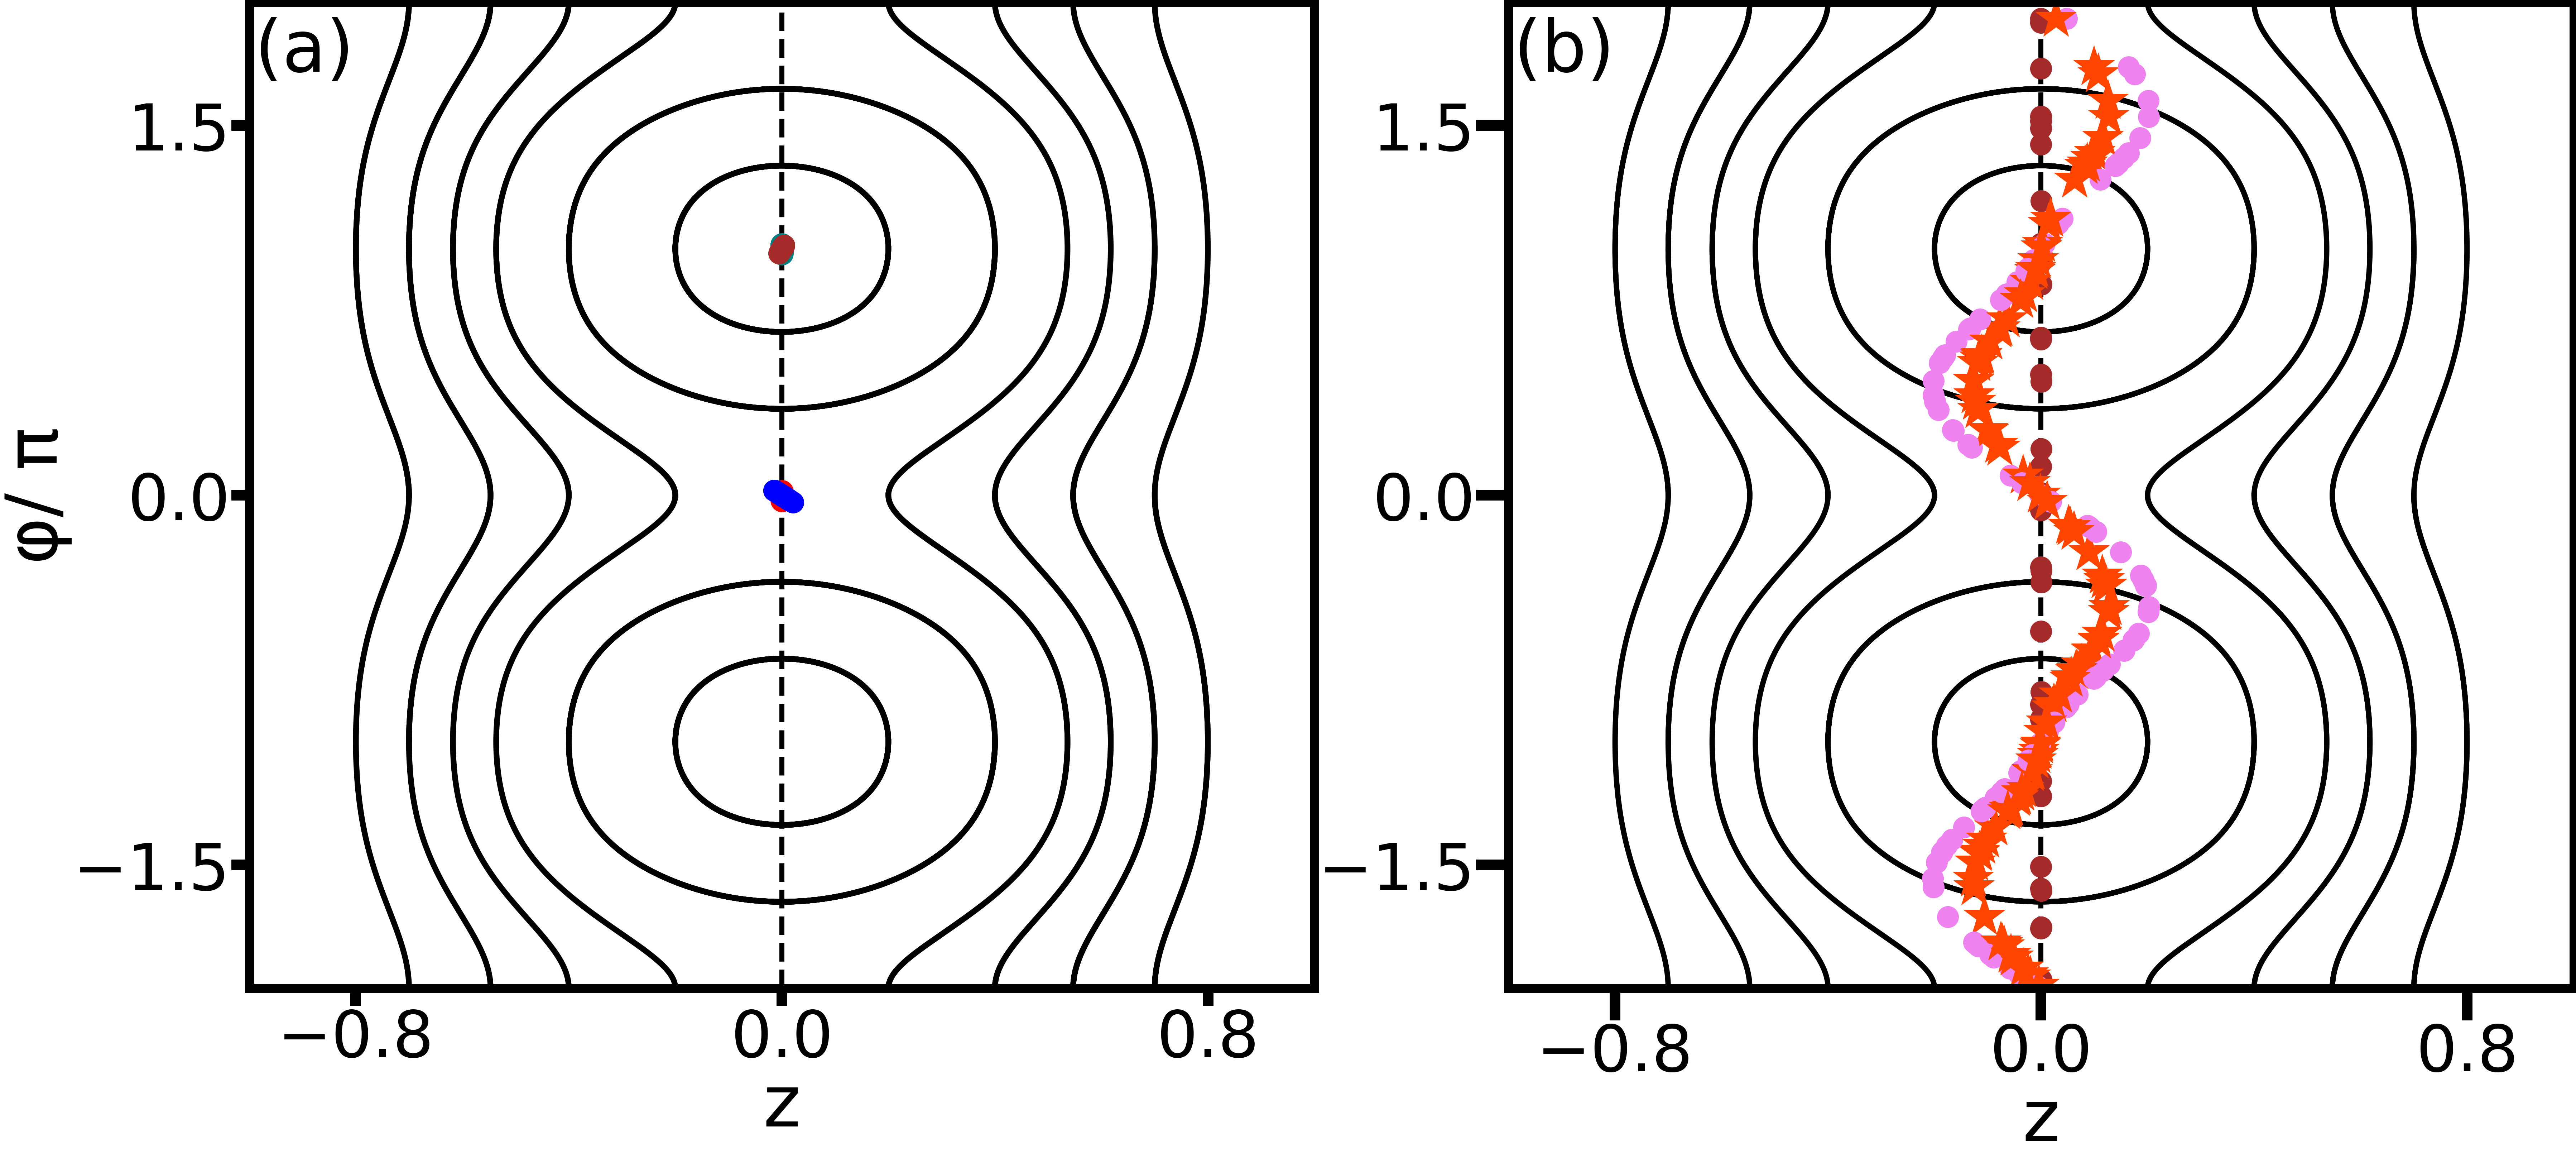

In [13]:
###############################################################################################################
######## Remaking the graph for second version of paper as per Seb's Comments and Suggestions ###########
################################################################################################################

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(100, 45),linewidth=100)
#fig.suptitle('Phase Space Plots')
### For Phase difference 0 ############
for i in range (len(z0)):
    for j in range (len(phi10)):
        y01=[z0[i],phi10[j]]
        psoln1 = odeint(f, y01, t, args=(params,))
        Phs1= psoln1[:,1]/pi
        ax1.plot(psoln1[:,0],Phs1,'black',linewidth=16)
        ax1.set_xlim(-1.,1.)
        ax1.set_ylim(-2.,2.)

#### For Phase Difference Pi ###########
for i in range (len(z0)):
    for j in range (len(phi20)):
        y02=[z0[i],phi20[j]]
        psoln2 = odeint(f, y02, t, args=(params,))
        Phs2= psoln2[:,1]/pi
        ax1.plot(psoln2[:,0],Phs2,'black',linewidth=16)
        ax1.set_xlim(-1.,1.)
        ax1.set_ylim(-2.,2.)
        ax1.set_xlabel('z',fontsize=200)
        ax1.set_ylabel('\u03C6/ \u03C0',fontsize=200)
#ax1.tick_params(axis='x', labelsize=200)
#ax1.tick_params(axis='y', labelsize=200)
ax1.axvline(x = 0, color = 'black', linewidth=14,linestyle='--',label = 'axvline - full height')
ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax1.tick_params(axis='both', which='major', labelsize=180, width=30, length=50)
#ax1.text(0.65,1.65,'t=0',fontsize=200,backgroundcolor='1.0')
ax1.text(-0.99,1.72,'(a)',fontsize=200)
############# At time = 0 ###########################
######### Plotting Trajectories (0,0) ###############
ax1.plot(zt1,phi1temp,'.',color='red',linewidth=2, markersize=127)
########################################################
ax1.spines['top'].set_linewidth(25)
ax1.spines['left'].set_linewidth(25)
ax1.spines['right'].set_linewidth(25)
ax1.spines['bottom'].set_linewidth(25)

######### Plotting Trajectories (0,pi) ############### 

ax1.plot(zt2,phi2temp,'.',color='teal',linewidth=2, markersize=127)

######## At a later time t#############################################

TFinal_bef=25
TInc_bef=0.05
TTraj_bef=np.arange (0., TFinal_bef, TInc_bef)
############################################################
for i in range (100):
    ################(0,0)############
    YTraj=[zt1[i],phit1[i]]
    psolnt=odeint(f, YTraj, TTraj_bef, args=(params,))
    PhaseTraj=psolnt[:,1]/pi
    ax1.plot(psolnt[:,0][499],PhaseTraj[499],'.',color='blue',markersize=120)
    ###########(0,pi)#####################
    YTraj2=[zt2[i],phit2[i]]
    psolnt2=odeint(f, YTraj2, TTraj_bef, args=(params,))
    PhaseTraj2=psolnt2[:,1]/pi
    ax1.plot(psolnt2[:,0][499],PhaseTraj2[499],'.',color='brown',markersize=120)
    #axins = zoomed_inset_axes(ax1, zoom = 1, loc=2)
    #axins.plot(psolnt2[:,0][499],PhaseTraj2[499],'.',color='brown',markersize=120)
    #axins.plot(zt2,phi2temp,'.',color='orange',linewidth=2, markersize=150)
#########################################################################################
#######################################################################################
######################################################################################
# inset axes....
# sub region of the original image
#x1, x2, y1, y2 = -0.25, 0.25, 0.5, 1.5
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#plt.xticks(visible=False)
#plt.yticks(visible=False)
#mark_inset(ax1, axins, loc1=1, loc2=4, fc="none", ec="0.5")
TFinal_af=25
TInc_af=0.00625
TTraj_af=np.arange (0., TFinal_af, TInc_af)
##############################################################
for i in range (len(z0)):
    for j in range (len(phi10)):
        y01=[z0[i],phi10[j]]
        psoln1 = odeint(f, y01, t, args=(params,))
        Phs1= psoln1[:,1]/pi
        ax2.plot(psoln1[:,0],Phs1,'black',linewidth=15)
        ax2.set_xlim(-1.,1.)
        ax2.set_ylim(-2.,2.)

#### For Phase Difference Pi ###########
for i in range (len(z0)):
    for j in range (len(phi20)):
        y02=[z0[i],phi20[j]]
        psoln2 = odeint(f, y02, t, args=(params,))
        Phs2= psoln2[:,1]/pi
        ax2.plot(psoln2[:,0],Phs2,'black',linewidth=15)
        ax2.set_xlim(-1.,1.)
        ax2.set_ylim(-2.,2.)
        ax2.set_xlabel('z',fontsize=200)
ax2.axvline(x = 0, color = 'black', linewidth=14,linestyle='--',label = 'axvline - full height')
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.tick_params(axis='both', which='major', labelsize=180, width=30, length=90)
############# At time = 0 ###########################
############### Normal Trajectory ######################
ax2.plot(zt3,phit3,'.',color='brown', markersize=120)
############
ax2.spines['top'].set_linewidth(25)
ax2.spines['left'].set_linewidth(25)
ax2.spines['right'].set_linewidth(25)
ax2.spines['bottom'].set_linewidth(25)
############### At a later time t-Shows Fragmentation ########
for i in range (100):
    ###############(Normal Distribution)####################
    YTraj3=[zt3[i],phit3[i]]
    psolnt3=odeint(f, YTraj3, TTraj_af, args=(params,))
    PhaseTraj3=psolnt3[:,1]/pi
    Ytraj4=[zt3[i],phit3[i]]
    psolnt4=odeint(f, Ytraj4, TTraj_af, args=(params_2,))
    PhaseTraj4=psolnt4[:,1]/pi
    ax2.plot(psolnt3[:,0][3999],PhaseTraj3[3999],'.',color='violet',markersize=120)
    ax2.plot(psolnt4[:,0][3999],PhaseTraj3[3999],'*',color='orangered',markersize=120)
#####################################################################
#ax2.text(0.60,1.65,'t=0.3',fontsize=200,backgroundcolor='1.0')
ax2.text(-0.99,1.72,'(b)',fontsize=200)
plt.tight_layout()
plt.savefig('Fig5-teal-brown.pdf', dpi=350)

(0.7, 1.2)

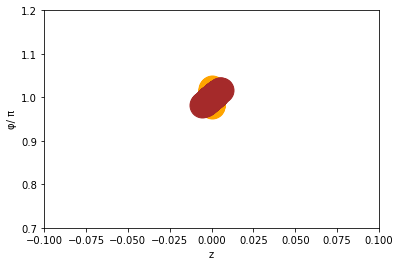

In [9]:

plt.plot(zt2,phi2temp,'.',color='orange',markersize=50)

######## At a later time t#############################################

TFinal_bef=25
TInc_bef=0.05
TTraj_bef=np.arange (0., TFinal_bef, TInc_bef)
############################################################
for i in range (500):
    ###########(0,pi)#####################
    YTraj2=[zt2[i],phit2[i]]
    psolnt2=odeint(f, YTraj2, TTraj_bef, args=(params,))
    PhaseTraj2=psolnt2[:,1]/pi
    plt.plot(psolnt2[:,0][499],PhaseTraj2[499],'.',color='brown',markersize=50)
plt.xlabel("z")
plt.ylabel('\u03C6/ \u03C0')
plt.xlim(-0.10,0.10)
plt.ylim(0.7,1.2)
#plt.savefig('T=25.png', dpi=300)

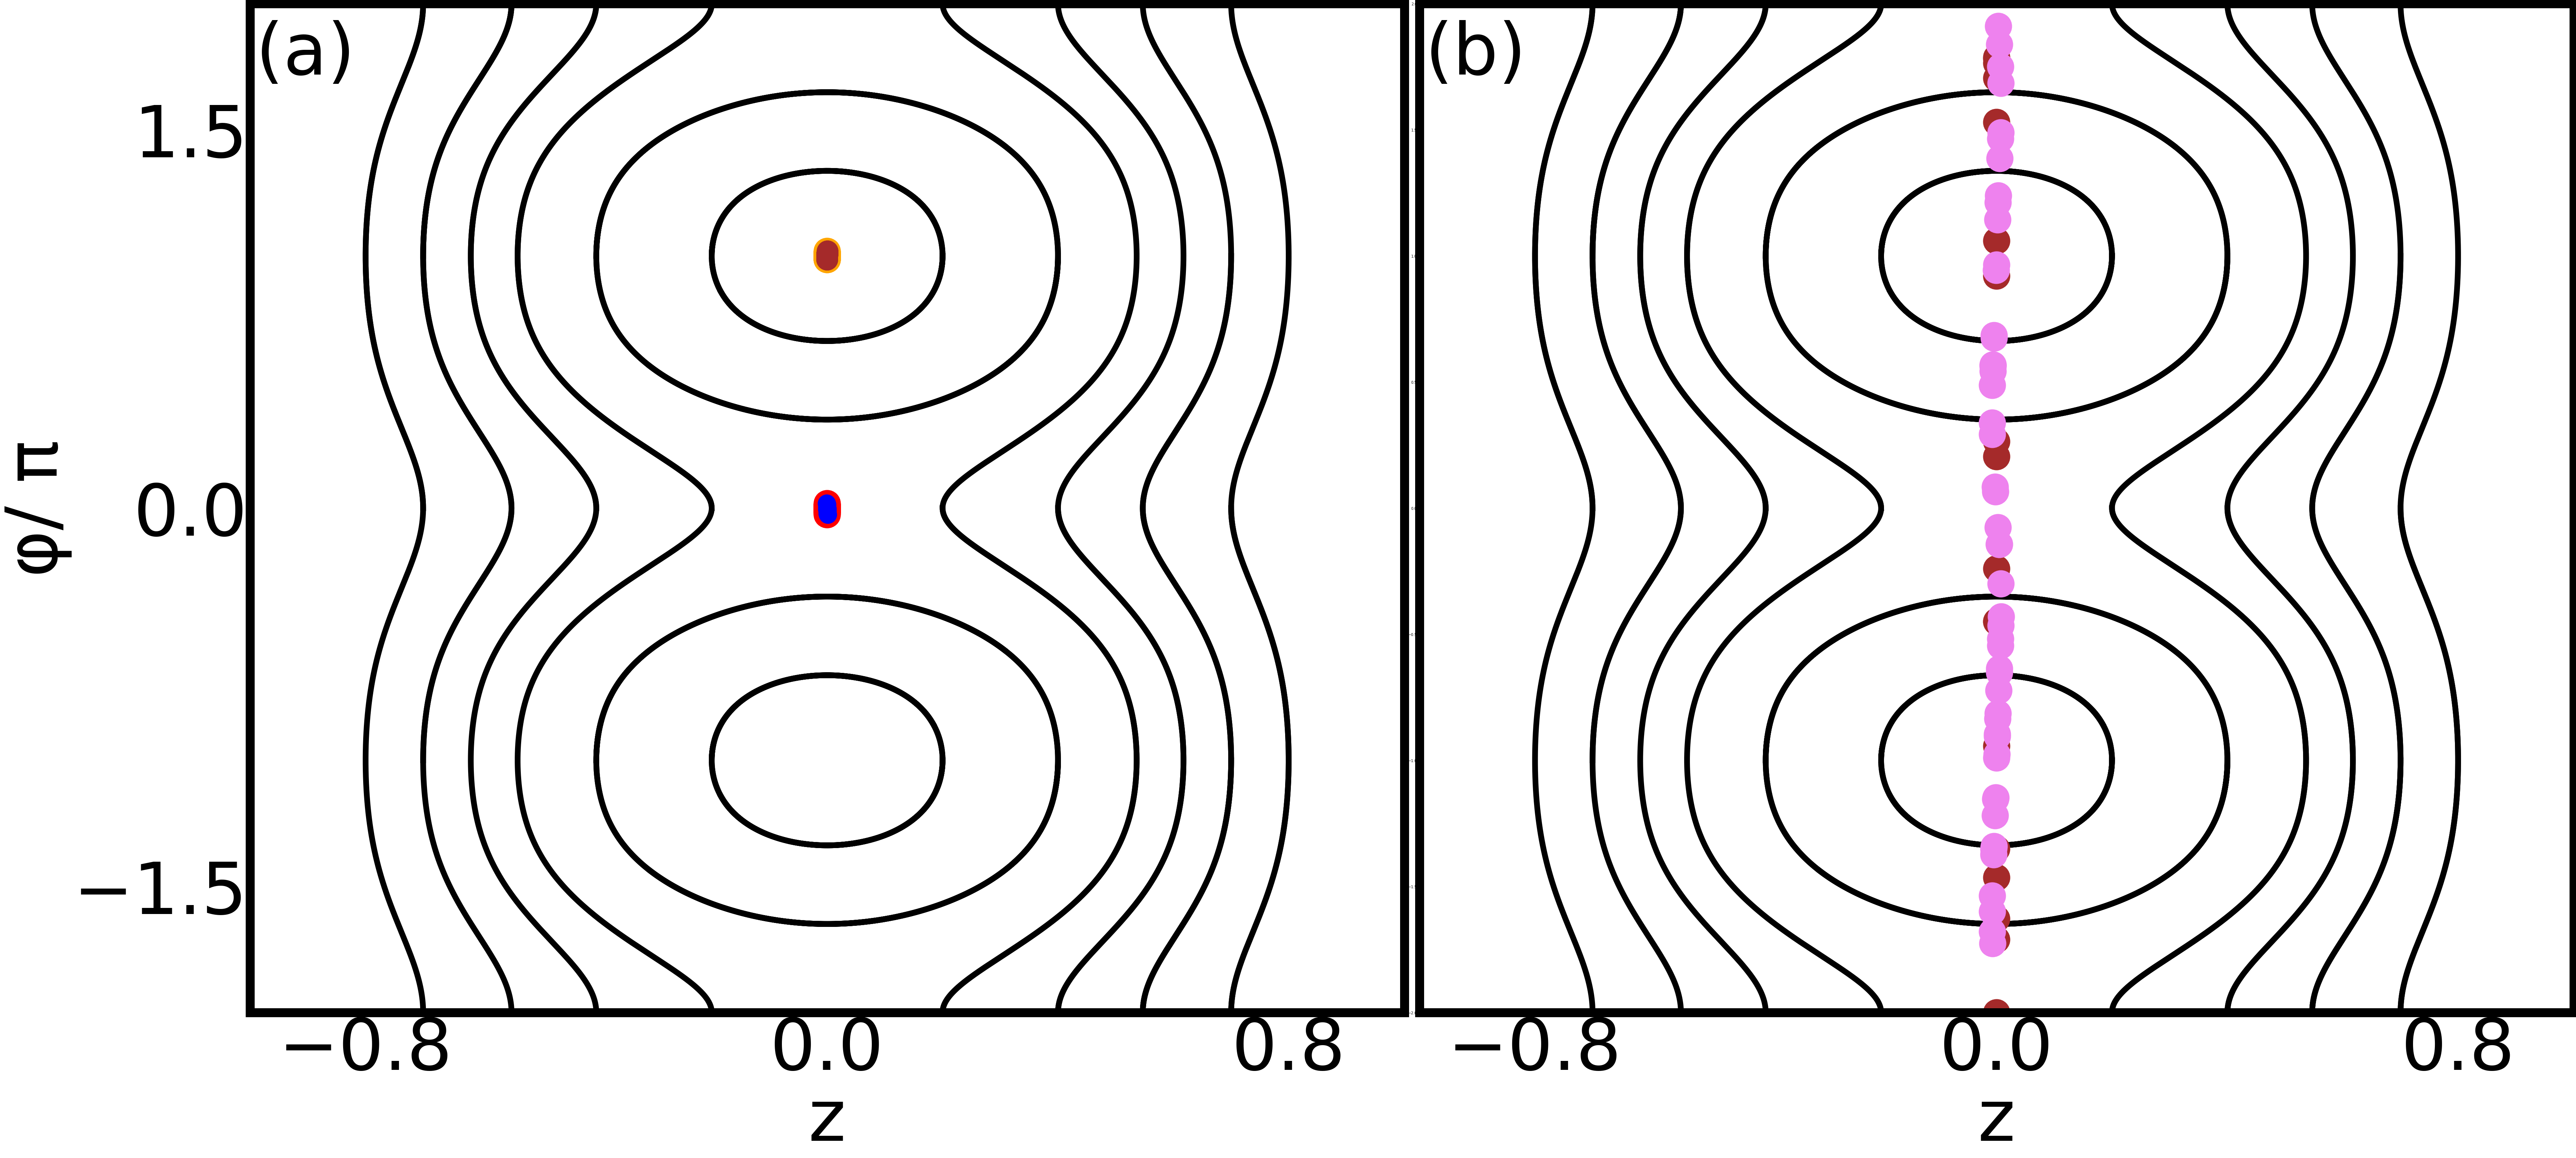

In [9]:
##################### Shorter Times ###############################################
#####################################################################################
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(100, 45))
#fig.suptitle('Phase Space Plots')
### For Phase difference 0 ############
for i in range (len(z0)):
    for j in range (len(phi10)):
        y01=[z0[i],phi10[j]]
        psoln1 = odeint(f, y01, t, args=(params,))
        Phs1= psoln1[:,1]/pi
        ax1.plot(psoln1[:,0],Phs1,'black',linewidth=16)
        ax1.set_xlim(-1.,1.)
        ax1.set_ylim(-2.,2.)

#### For Phase Difference Pi ###########
for i in range (len(z0)):
    for j in range (len(phi20)):
        y02=[z0[i],phi20[j]]
        psoln2 = odeint(f, y02, t, args=(params,))
        Phs2= psoln2[:,1]/pi
        ax1.plot(psoln2[:,0],Phs2,'black',linewidth=16)
        ax1.set_xlim(-1.,1.)
        ax1.set_ylim(-2.,2.)
        ax1.set_xlabel('z',fontsize=200)
        ax1.set_ylabel('\u03C6/ \u03C0',fontsize=200)
ax1.tick_params(axis='x', labelsize=200)
ax1.tick_params(axis='y', labelsize=200)
ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
#ax1.text(0.65,1.65,'t=0',fontsize=200,backgroundcolor='1.0')
ax1.text(-0.99,1.72,'(a)',fontsize=200)
############# At time = 0 ###########################
######### Plotting Trajectories (0,0) ###############
ax1.plot(zt1,phi1temp,'.',color='red',linewidth=2, markersize=150)

######### Plotting Trajectories (0,pi) ############### 

ax1.plot(zt2,phi2temp,'.',color='orange',linewidth=2, markersize=150)

########################################################
ax1.spines['top'].set_linewidth(25)
ax1.spines['left'].set_linewidth(25)
ax1.spines['right'].set_linewidth(25)
ax1.spines['bottom'].set_linewidth(25)

######## At a later time t#############################################

TFinal_bef=1
TInc_bef=0.05
TTraj_bef=np.arange (0., TFinal_bef, TInc_bef)
############################################################
for i in range (50):
    ################(0,0)############
    YTraj=[zt1[i],phit1[i]]
    psolnt=odeint(f, YTraj, TTraj_bef, args=(params,))
    PhaseTraj=psolnt[:,1]/pi
    ax1.plot(psolnt[:,0][19],PhaseTraj[19],'.',color='blue',markersize=100)
    ###########(0,pi)#####################
    YTraj2=[zt2[i],phit2[i]]
    psolnt2=odeint(f, YTraj2, TTraj_bef, args=(params,))
    PhaseTraj2=psolnt2[:,1]/pi
    ax1.plot(psolnt2[:,0][19],PhaseTraj2[19],'.',color='brown',markersize=120)
#########################################################################################
#######################################################################################
######################################################################################

TFinal_af=1
TInc_af=0.05
TTraj_af=np.arange (0., TFinal_af, TInc_af)
##############################################################
for i in range (len(z0)):
    for j in range (len(phi10)):
        y01=[z0[i],phi10[j]]
        psoln1 = odeint(f, y01, t, args=(params,))
        Phs1= psoln1[:,1]/pi
        ax2.plot(psoln1[:,0],Phs1,'black',linewidth=16)
        ax2.set_xlim(-1.,1.)
        ax2.set_ylim(-2.,2.)

#### For Phase Difference Pi ###########
for i in range (len(z0)):
    for j in range (len(phi20)):
        y02=[z0[i],phi20[j]]
        psoln2 = odeint(f, y02, t, args=(params,))
        Phs2= psoln2[:,1]/pi
        ax2.plot(psoln2[:,0],Phs2,'black',linewidth=16)
        ax2.set_xlim(-1.,1.)
        ax2.set_ylim(-2.,2.)
        ax2.set_xlabel('z',fontsize=200)

ax2.tick_params(axis="x", labelsize=200)
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
############# At time = 0 ###########################
############### Normal Trajectory ######################
ax2.plot(zt3,phit3,'.',color='brown', markersize=150)
############
ax2.spines['top'].set_linewidth(25)
ax2.spines['left'].set_linewidth(25)
ax2.spines['right'].set_linewidth(25)
ax2.spines['bottom'].set_linewidth(25)
############### At a later time t-Shows Fragmentation ########
for i in range (50):
    ###############(Normal Distribution)####################
    YTraj3=[zt3[i],phit3[i]]
    psolnt3=odeint(f, YTraj3, TTraj_af, args=(params,))
    PhaseTraj3=psolnt3[:,1]/pi
    ax2.plot(psolnt3[:,0][19],PhaseTraj3[19],'.',color='violet',markersize=150)
#####################################################################
#ax2.text(0.60,1.65,'t=0.3',fontsize=200,backgroundcolor='1.0')
ax2.text(-0.99,1.72,'(b)',fontsize=200)
plt.tight_layout()
plt.savefig('ShorterTimeT_v4.pdf', dpi=300)